<a href="https://colab.research.google.com/github/TheodorosChristou/ConferencePaperCode/blob/main/Research_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Vit_keras
!pip install vit_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.13.0 tensorflow-addons==0.21.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 38.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.20

In [ ]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy import argmax

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten,
                                     Conv2D, MaxPooling2D, BatchNormalization,
                                     GlobalAveragePooling2D, Input)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar100

# Additional libraries
import tensorflow_addons as tfa
from vit_keras import vit, utils

# Plotting
from pylab import rcParams
%matplotlib inline

# Accessing files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


/kaggle/input/predictions2/Images/cl-television.jpg
/kaggle/input/predictions2/Images/Bouteille.jpg
/kaggle/input/predictions2/Images/Cardiff_Bus_in_St_Mary_Street_Cardiff._April_2023.jpg
/kaggle/input/predictions2/Images/30730637487-monarch-danaus-plexippus.jpg
/kaggle/input/predictions2/Images/020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg
/kaggle/input/predictions2/Images/RF-10008-RIPE-ORGANIC-ORGANIC-APPLE-GALA.jpg
/kaggle/input/predictions2/Images/oranges_opt.jpg
/kaggle/input/predictions2/Images/Cow_(Fleckvieh_breed)_Oeschinensee_Slaunger_2009-07-07.jpg
/kaggle/input/predictions2/Images/pexels-pixabay-56832.jpg
/kaggle/input/predictions2/Images/Mental-Strong-Women-min-480x340.jpg


In [ ]:
#Set Random seed number, ensuring same results between several reruns of the code
np.random.seed(11)
tf.random.set_seed(11)

In [ ]:
#Download cifar100 from keras library
(train_data, train_label), (test_data, test_label) = keras.datasets.cifar100.load_data()

#Preprocess Dataset
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
train_data = (train_data/255.).astype("float32")
test_data = (test_data/255.).astype("float32")

169001437/169001437 [==============================] - 5s 0us/step


In [ ]:
#Cut train set for training and validation
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, random_state=11, shuffle=True)

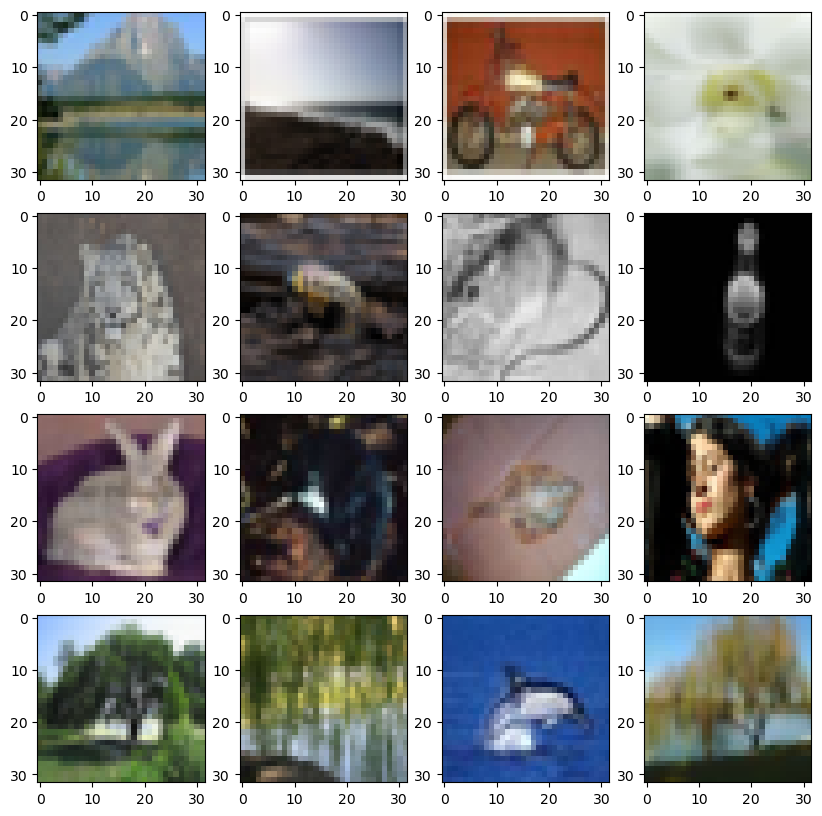

In [ ]:
#Showcase Dataset
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(train_data[rand_num])

#Create training plot function to showcase training and validation accuracies
def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

#Create evaluation function, showcasing the final model scores
def evaluation(model):
  prediction = []
  true_labels = []
  classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
'aquarium' ,'fish', 'ray', 'shark', 'trout',
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
'bottles', 'bowls', 'cans', 'cups', 'plates',
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe',
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
'bear', 'leopard', 'lion', 'tiger', 'wolf',
'bridge', 'castle', 'house', 'road', 'skyscraper',
'cloud', 'forest', 'mountain', 'plain', 'sea',
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
'crab', 'lobster', 'snail', 'spider', 'worm',
'baby', 'boy', 'girl', 'man', 'woman',
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
'maple', 'oak', 'palm', 'pine', 'willow',
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

  pred = model.predict(test_data)
  print(test_label.shape[0])
  for i in range(test_label.shape[0]):
    prediction.append(argmax(pred[i]))
    true_labels.append(argmax(test_label[i]))

  print(classification_report(true_labels, prediction, target_names=classes, digits=5))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 128)      5

2024-10-05 11:48:37.482338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 10s 10ms/step - loss: 6.5707 - accuracy: 0.0278 - val_loss: 5.6702 - val_accuracy: 0.0542
Epoch 2/20
586/586 [==============================] - 5s 8ms/step - loss: 5.9630 - accuracy: 0.0527 - val_loss: 5.2257 - val_accuracy: 0.1046
Epoch 3/20
586/586 [==============================] - 5s 8ms/step - loss: 5.6204 - accuracy: 0.0718 - val_loss: 5.0322 - val_accuracy: 0.1256
Epoch 4/20
586/586 [==============================] - 5s 8ms/step - loss: 5.3859 - accuracy: 0.0877 - val_loss: 4.8870 - val_accuracy: 0.1430
Epoch 5/20
586/586 [==============================] - 5s 8ms/step - loss: 5.1769 - accuracy: 0.1037 - val_loss: 4.7390 - val_accuracy: 0.1596
Epoch 6/20
586/586 [==============================] - 5s 8ms/step - loss: 4.9944 - accuracy: 0.1216 - val_loss: 4.6026 - val_accuracy: 0.1794
Epoch 7/20
586/586 [==============================] - 5s 8ms/step - loss: 4.8423 - accuracy: 0.1347 - val_loss: 4.4567 - val_accuracy: 0.1971
Epoch 8/20
586/

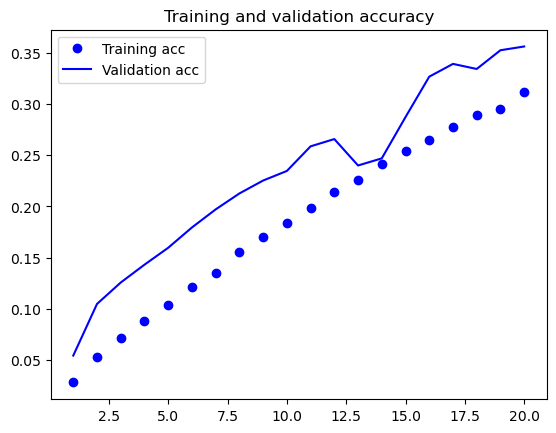

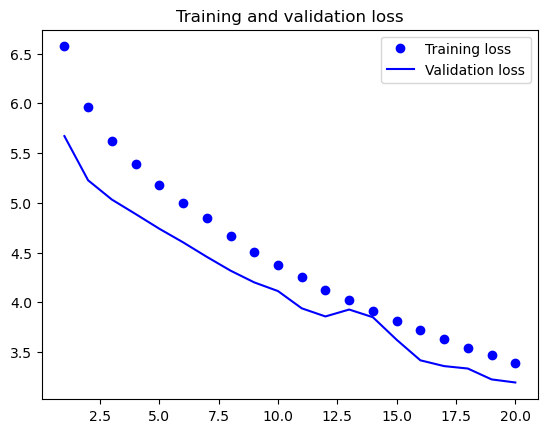

313/313 [==============================] - 1s 2ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.69792   0.67000   0.68367       100
          dolphin    0.47872   0.45000   0.46392       100
            otter    0.24786   0.29000   0.26728       100
             seal    0.14667   0.11000   0.12571       100
            whale    0.17476   0.18000   0.17734       100
         aquarium    0.20103   0.39000   0.26531       100
             fish    0.38144   0.37000   0.37563       100
              ray    0.47541   0.29000   0.36025       100
            shark    0.24681   0.58000   0.34627       100
            trout    0.49462   0.46000   0.47668       100
          orchids    0.26316   0.10000   0.14493       100
          poppies    0.41026   0.16000   0.23022       100
            roses    0.35577   0.37000   0.36275       100
       sunflowers    0.38889   0.14000   0.20588       100
           tulips    0.33333   0.11000   0.16541     

In [ ]:
def CNN():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

CNN = CNN()


from tensorflow.keras import optimizers
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
CNN.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

CNN.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN)
        scores = CNN.evaluate(test_data, test_label)
        print(f'accuracy on test set: {CNN.metrics_names[1]} of {scores[1]*100}')
        return CNN

CNN = gpu()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)       

2024-10-05 11:52:12.572214: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 9s 12ms/step - loss: 5.5235 - accuracy: 0.0166 - val_loss: 4.6140 - val_accuracy: 0.0211
Epoch 2/20
586/586 [==============================] - 6s 11ms/step - loss: 4.9278 - accuracy: 0.0327 - val_loss: 4.2264 - val_accuracy: 0.0605
Epoch 3/20
586/586 [==============================] - 6s 11ms/step - loss: 4.6193 - accuracy: 0.0445 - val_loss: 4.0929 - val_accuracy: 0.0778
Epoch 4/20
586/586 [==============================] - 6s 11ms/step - loss: 4.3962 - accuracy: 0.0606 - val_loss: 4.0459 - val_accuracy: 0.0838
Epoch 5/20
586/586 [==============================] - 6s 11ms/step - loss: 4.2448 - accuracy: 0.0741 - val_loss: 3.9035 - val_accuracy: 0.0982
Epoch 6/20
586/586 [==============================] - 6s 11ms/step - loss: 4.1033 - accuracy: 0.0884 - val_loss: 3.8260 - val_accuracy: 0.1153
Epoch 7/20
586/586 [==============================] - 6s 11ms/step - loss: 3.9764 - accuracy: 0.1005 - val_loss: 3.6710 - val_accuracy: 0.1350
Epoch 8/20

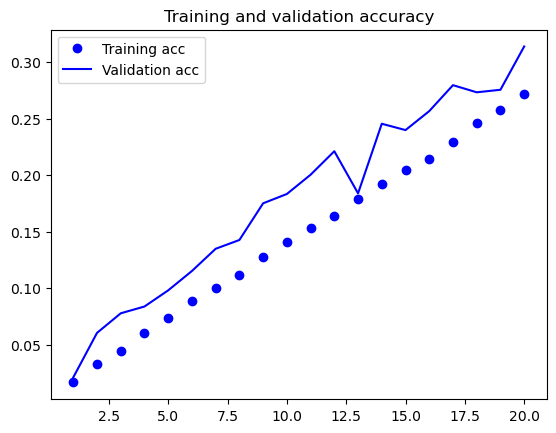

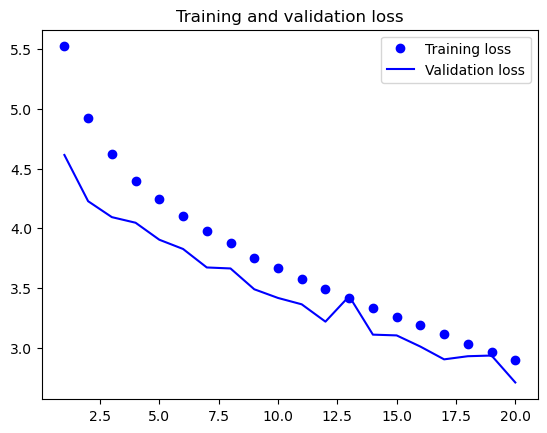

313/313 [==============================] - 1s 2ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.56667   0.68000   0.61818       100
          dolphin    0.38532   0.42000   0.40191       100
            otter    0.17284   0.14000   0.15470       100
             seal    0.17045   0.15000   0.15957       100
            whale    0.09424   0.18000   0.12371       100
         aquarium    0.23288   0.17000   0.19653       100
             fish    0.33962   0.36000   0.34951       100
              ray    0.34783   0.24000   0.28402       100
            shark    0.25789   0.49000   0.33793       100
            trout    0.70000   0.28000   0.40000       100
          orchids    0.31111   0.14000   0.19310       100
          poppies    0.37500   0.15000   0.21429       100
            roses    0.35922   0.37000   0.36453       100
       sunflowers    0.42308   0.11000   0.17460       100
           tulips    0.27500   0.11000   0.15714     

In [ ]:
def VGG():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG = VGG()

optimizer = Adam(learning_rate=0.0001)
VGG.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

VGG.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG)
        scores = VGG.evaluate(test_data, test_label)
        print(f'accuracy on test set: {VGG.metrics_names[1]} of {scores[1]*100}')
        return VGG

VGG = gpu()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_17 (Conv2D)             (None, 32, 32, 128)  3584        ['input_1[0][0]']                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 32, 32, 128)  147584      ['conv2d_17[0][0]']              
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 16, 16, 128)  0          ['conv2d_18[0][0]']              
                                                                                              

2024-10-05 11:56:52.588900: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 13s 20ms/step - loss: 4.8108 - accuracy: 0.0493 - val_loss: 4.5237 - val_accuracy: 0.0524
Epoch 2/20
586/586 [==============================] - 11s 18ms/step - loss: 4.2719 - accuracy: 0.0882 - val_loss: 4.0545 - val_accuracy: 0.1130
Epoch 3/20
586/586 [==============================] - 11s 18ms/step - loss: 3.9675 - accuracy: 0.1237 - val_loss: 3.4554 - val_accuracy: 0.1886
Epoch 4/20
586/586 [==============================] - 11s 18ms/step - loss: 3.6799 - accuracy: 0.1579 - val_loss: 3.8339 - val_accuracy: 0.1444
Epoch 5/20
586/586 [==============================] - 11s 18ms/step - loss: 3.4372 - accuracy: 0.1933 - val_loss: 3.5786 - val_accuracy: 0.2082
Epoch 6/20
586/586 [==============================] - 11s 18ms/step - loss: 3.2489 - accuracy: 0.2202 - val_loss: 3.1303 - val_accuracy: 0.2500
Epoch 7/20
586/586 [==============================] - 11s 18ms/step - loss: 3.0785 - accuracy: 0.2482 - val_loss: 3.0160 - val_accuracy: 0.2844
Epo

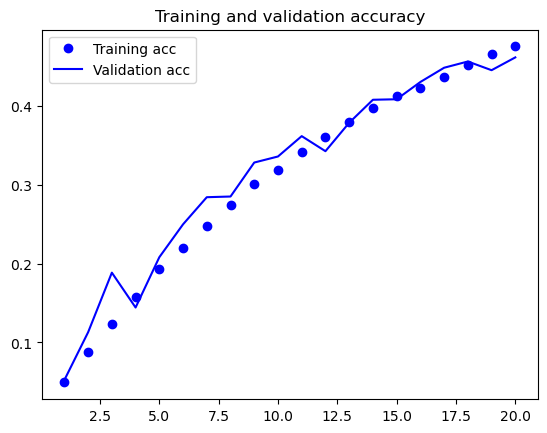

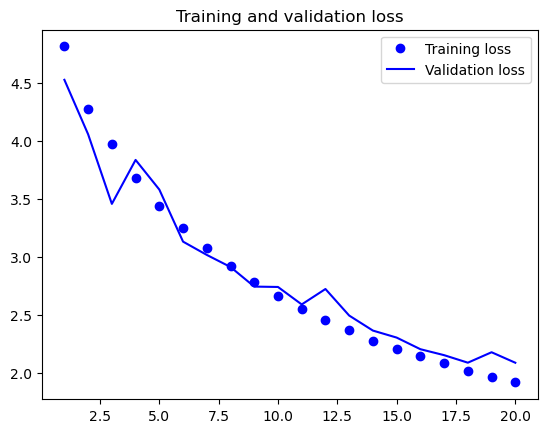

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.64567   0.82000   0.72247       100
          dolphin    0.64646   0.64000   0.64322       100
            otter    0.38614   0.39000   0.38806       100
             seal    0.25806   0.32000   0.28571       100
            whale    0.25664   0.29000   0.27230       100
         aquarium    0.42683   0.35000   0.38462       100
             fish    0.61905   0.52000   0.56522       100
              ray    0.53333   0.32000   0.40000       100
            shark    0.59821   0.67000   0.63208       100
            trout    0.48819   0.62000   0.54626       100
          orchids    0.39394   0.26000   0.31325       100
          poppies    0.33333   0.19000   0.24204       100
            roses    0.48696   0.56000   0.52093       100
       sunflowers    0.42029   0.29000   0.34320       100
           tulips    0.45000   0.18000   0.25714     

In [ ]:
def ResNet():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    for _ in range(2):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.4)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet = ResNet()

optimizer = Adam(learning_rate=0.0001)
ResNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

ResNet.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet)
        scores = ResNet.evaluate(test_data, test_label)
        print(f'accuracy on test set: {ResNet.metrics_names[1]} of {scores[1]*100}')
        return ResNet

ResNet = gpu()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_19 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 16, 16, 64)       640       
 Conv2D)                                                         
                                                                 
 batch_normalization_20 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

2024-10-05 12:01:21.871123: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 8s 12ms/step - loss: 4.5406 - accuracy: 0.0306 - val_loss: 4.7336 - val_accuracy: 0.0204
Epoch 2/20
586/586 [==============================] - 6s 10ms/step - loss: 4.1866 - accuracy: 0.0647 - val_loss: 3.9827 - val_accuracy: 0.0975
Epoch 3/20
586/586 [==============================] - 6s 10ms/step - loss: 3.9649 - accuracy: 0.0933 - val_loss: 3.7653 - val_accuracy: 0.1324
Epoch 4/20
586/586 [==============================] - 6s 10ms/step - loss: 3.7674 - accuracy: 0.1214 - val_loss: 3.6119 - val_accuracy: 0.1544
Epoch 5/20
586/586 [==============================] - 6s 10ms/step - loss: 3.6285 - accuracy: 0.1445 - val_loss: 3.4677 - val_accuracy: 0.1779
Epoch 6/20
586/586 [==============================] - 6s 10ms/step - loss: 3.5072 - accuracy: 0.1638 - val_loss: 3.3513 - val_accuracy: 0.2006
Epoch 7/20
586/586 [==============================] - 6s 10ms/step - loss: 3.3915 - accuracy: 0.1845 - val_loss: 3.2616 - val_accuracy: 0.2138
Epoch 8/20

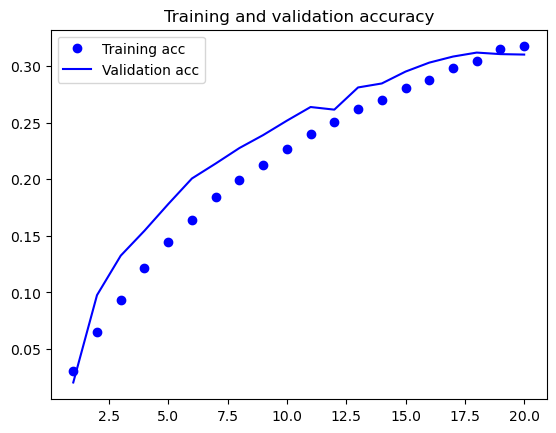

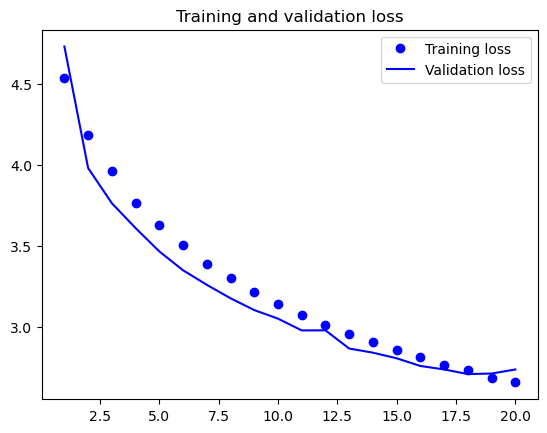

313/313 [==============================] - 1s 2ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.51370   0.75000   0.60976       100
          dolphin    0.36792   0.39000   0.37864       100
            otter    0.27174   0.25000   0.26042       100
             seal    0.11111   0.10000   0.10526       100
            whale    0.11429   0.12000   0.11707       100
         aquarium    0.15306   0.45000   0.22843       100
             fish    0.43103   0.25000   0.31646       100
              ray    0.35714   0.10000   0.15625       100
            shark    0.24855   0.43000   0.31502       100
            trout    0.29299   0.46000   0.35798       100
          orchids    0.19231   0.10000   0.13158       100
          poppies    0.25000   0.11000   0.15278       100
            roses    0.29752   0.36000   0.32579       100
       sunflowers    0.22917   0.22000   0.22449       100
           tulips    0.38235   0.13000   0.19403     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D

def MobileNet():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())

    model.add(Dropout(0.4))

    model.add(Dense(100, activation='softmax'))

    return model



MobileNet = MobileNet()

MobileNet.summary()

optimizer = Adam(learning_rate=0.0001)
MobileNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = MobileNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet)
        scores = MobileNet.evaluate(test_data, test_label)
        print(f'accuracy on test set: {MobileNet.metrics_names[1]} of {scores[1]*100}')
        return MobileNet

MobileNet = gpu()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_30 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu (ReLU)                (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 96)        3072      
                                                                 
 batch_normalization_31 (Bat  (None, 16, 16, 96)       384       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 96)       

2024-10-05 12:03:29.112967: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 9s 12ms/step - loss: 4.7205 - accuracy: 0.0215 - val_loss: 4.8100 - val_accuracy: 0.0134
Epoch 2/20
586/586 [==============================] - 6s 10ms/step - loss: 4.3280 - accuracy: 0.0478 - val_loss: 4.0984 - val_accuracy: 0.0726
Epoch 3/20
586/586 [==============================] - 6s 10ms/step - loss: 4.0767 - accuracy: 0.0743 - val_loss: 3.9466 - val_accuracy: 0.0963
Epoch 4/20
586/586 [==============================] - 6s 10ms/step - loss: 3.8909 - accuracy: 0.0975 - val_loss: 3.7937 - val_accuracy: 0.1190
Epoch 5/20
586/586 [==============================] - 6s 10ms/step - loss: 3.7509 - accuracy: 0.1215 - val_loss: 3.6076 - val_accuracy: 0.1442
Epoch 6/20
586/586 [==============================] - 6s 10ms/step - loss: 3.6279 - accuracy: 0.1419 - val_loss: 3.4665 - val_accuracy: 0.1701
Epoch 7/20
586/586 [==============================] - 6s 10ms/step - loss: 3.5183 - accuracy: 0.1600 - val_loss: 3.3602 - val_accuracy: 0.1887
Epoch 8/20

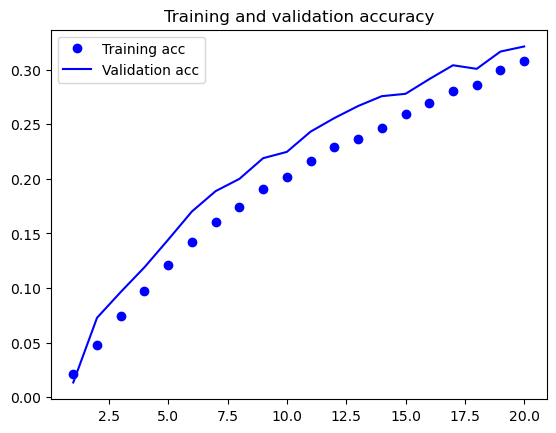

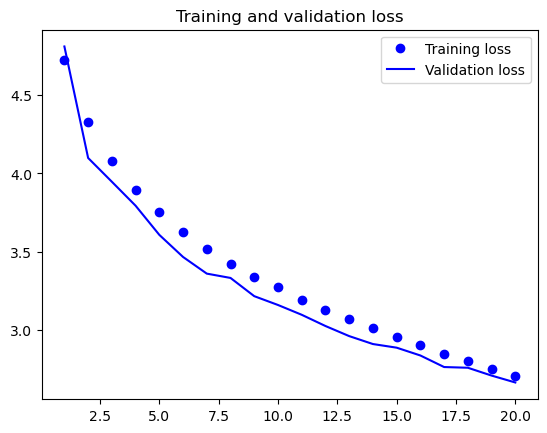

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.47239   0.77000   0.58555       100
          dolphin    0.42000   0.42000   0.42000       100
            otter    0.27368   0.26000   0.26667       100
             seal    0.21176   0.18000   0.19459       100
            whale    0.10769   0.14000   0.12174       100
         aquarium    0.28182   0.31000   0.29524       100
             fish    0.40351   0.23000   0.29299       100
              ray    0.44286   0.31000   0.36471       100
            shark    0.25731   0.44000   0.32472       100
            trout    0.44444   0.48000   0.46154       100
          orchids    0.20588   0.07000   0.10448       100
          poppies    0.23810   0.05000   0.08264       100
            roses    0.32292   0.31000   0.31633       100
       sunflowers    0.36620   0.26000   0.30409       100
           tulips    0.48000   0.12000   0.19200     

In [ ]:
import math
import time

def EfficientNet(width_coefficient=1.0, depth_coefficient=1.0, resolution_coefficient=1.0, dropout_rate=0.2):
    model = models.Sequential()

    def round_filters(filters, multiplier):
        divisor = 8
        min_depth = None
        if not multiplier:
            return filters

        filters *= multiplier
        min_depth = divisor
        new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
        if new_filters < 0.9 * filters:
            new_filters += divisor
        return int(new_filters)

    def round_repeats(repeats, multiplier):
        if not multiplier:
            return repeats
        return int(math.ceil(multiplier * repeats))

    def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
        expand_filters = input_filters * expand_ratio
        model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

        model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

        if 0 < se_ratio <= 1:
            filters_se = max(1, int(input_filters * se_ratio))
            se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
            se = layers.Reshape((1, 1, expand_filters))(se)
            se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
            se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
            x = layers.multiply([model.layers[-1].output, se])
        else:
            x = model.layers[-1].output

        model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())

        if id_skip and strides == 1 and input_filters == output_filters:
            if drop_connect_rate:
                model.add(layers.Dropout(drop_connect_rate))
            model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 5
    strides = [1, 2, 2, 2, 2, 1]
    kernels = [3, 3, 3, 3, 5, 5]
    filters = [16, 24, 40, 80, 112, 112]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax'))

    return model

EfficientNet = EfficientNet()

optimizer = Adam(learning_rate=0.0001)
EfficientNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

EfficientNet.summary()

def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = EfficientNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet)
        scores = EfficientNet.evaluate(test_data, test_label)
        print(f'accuracy on test set: {EfficientNet.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet

EfficientNet = gpu()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_53 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_54 (Bat  (None, 28, 28, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)     

2024-10-05 12:14:05.814464: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_34/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 12s 18ms/step - loss: 7.1934 - accuracy: 0.0206 - val_loss: 8.4418 - val_accuracy: 0.0213
Epoch 2/50
586/586 [==============================] - 10s 16ms/step - loss: 6.5494 - accuracy: 0.0400 - val_loss: 7.5187 - val_accuracy: 0.0234
Epoch 3/50
586/586 [==============================] - 10s 17ms/step - loss: 6.2173 - accuracy: 0.0613 - val_loss: 6.5677 - val_accuracy: 0.0389
Epoch 4/50
586/586 [==============================] - 10s 17ms/step - loss: 5.9655 - accuracy: 0.0768 - val_loss: 6.1204 - val_accuracy: 0.0522
Epoch 5/50
586/586 [==============================] - 10s 16ms/step - loss: 5.7725 - accuracy: 0.0895 - val_loss: 5.9948 - val_accuracy: 0.0602
Epoch 6/50
586/586 [==============================] - 10s 17ms/step - loss: 5.5789 - accuracy: 0.0996 - val_loss: 5.7440 - val_accuracy: 0.0768
Epoch 7/50
586/586 [==============================] - 10s 17ms/step - loss: 5.4024 - accuracy: 0.1133 - val_loss: 5.6485 - val_accuracy: 0.0834
Epo

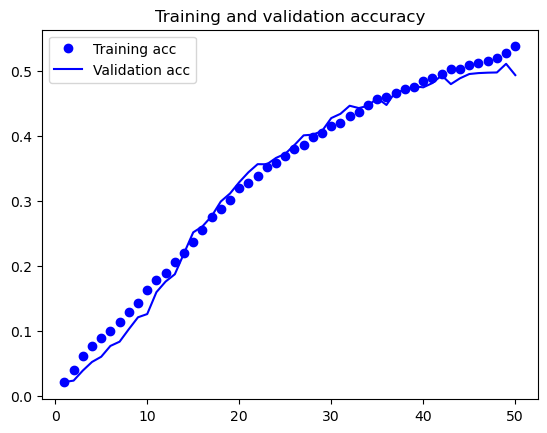

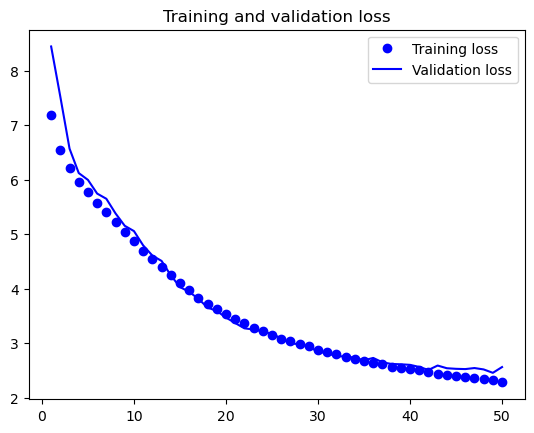

313/313 [==============================] - 1s 2ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.62698   0.79000   0.69912       100
          dolphin    0.68889   0.62000   0.65263       100
            otter    0.42553   0.40000   0.41237       100
             seal    0.25316   0.20000   0.22346       100
            whale    0.31707   0.13000   0.18440       100
         aquarium    0.39785   0.37000   0.38342       100
             fish    0.66265   0.55000   0.60109       100
              ray    0.72581   0.45000   0.55556       100
            shark    0.77500   0.62000   0.68889       100
            trout    0.72727   0.72000   0.72362       100
          orchids    0.50649   0.39000   0.44068       100
          poppies    0.42308   0.22000   0.28947       100
            roses    0.62963   0.51000   0.56354       100
       sunflowers    0.57895   0.22000   0.31884       100
           tulips    0.61538   0.32000   0.42105     

In [ ]:
def CNN2():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model



CNN2 = CNN2()

optimizer = Adam(learning_rate=0.0001)
CNN2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

CNN2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN2)
        scores = CNN2.evaluate(test_data, test_label)
        print(f'accuracy on test set: {CNN2.metrics_names[1]} of {scores[1]*100}')
        return CNN2

CNN2 = gpu()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_59 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 128)      

2024-10-05 12:25:08.857501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_40/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 11s 17ms/step - loss: 16.5201 - accuracy: 0.0200 - val_loss: 15.0896 - val_accuracy: 0.0126
Epoch 2/50
586/586 [==============================] - 9s 15ms/step - loss: 13.2281 - accuracy: 0.0395 - val_loss: 11.6552 - val_accuracy: 0.0486
Epoch 3/50
586/586 [==============================] - 9s 15ms/step - loss: 10.6712 - accuracy: 0.0579 - val_loss: 9.4598 - val_accuracy: 0.0728
Epoch 4/50
586/586 [==============================] - 9s 15ms/step - loss: 8.7367 - accuracy: 0.0757 - val_loss: 7.8220 - val_accuracy: 0.0829
Epoch 5/50
586/586 [==============================] - 9s 15ms/step - loss: 7.3118 - accuracy: 0.0973 - val_loss: 6.6892 - val_accuracy: 0.1036
Epoch 6/50
586/586 [==============================] - 9s 15ms/step - loss: 6.3205 - accuracy: 0.1165 - val_loss: 5.9151 - val_accuracy: 0.1328
Epoch 7/50
586/586 [==============================] - 9s 15ms/step - loss: 5.5831 - accuracy: 0.1369 - val_loss: 5.5149 - val_accuracy: 0.1235
Epoc

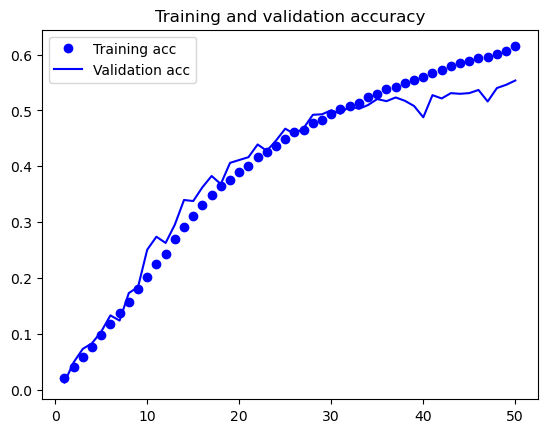

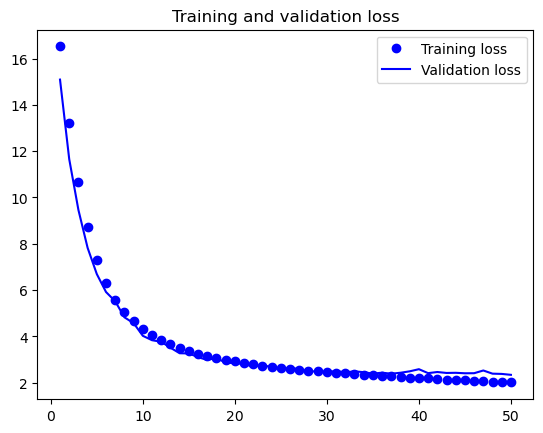

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.81111   0.73000   0.76842       100
          dolphin    0.72000   0.72000   0.72000       100
            otter    0.40164   0.49000   0.44144       100
             seal    0.26087   0.30000   0.27907       100
            whale    0.30769   0.36000   0.33180       100
         aquarium    0.40000   0.68000   0.50370       100
             fish    0.70732   0.58000   0.63736       100
              ray    0.60227   0.53000   0.56383       100
            shark    0.70588   0.72000   0.71287       100
            trout    0.69091   0.76000   0.72381       100
          orchids    0.52632   0.40000   0.45455       100
          poppies    0.43590   0.34000   0.38202       100
            roses    0.55455   0.61000   0.58095       100
       sunflowers    0.55172   0.48000   0.51337       100
           tulips    0.58209   0.39000   0.46707     

In [ ]:
def VGG2():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG2 = VGG2()

optimizer = Adam(learning_rate=0.0001)
VGG2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


VGG2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG2)
        scores = VGG2.evaluate(test_data, test_label)
        print(f'accuracy on test set: {VGG2.metrics_names[1]} of {scores[1]*100}')
        return VGG2

VGG2 = gpu()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_48 (Conv2D)          (None, 32, 32, 128)          3584      ['input_3[0][0]']             
                                                                                                  
 conv2d_49 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_48[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)          0         ['conv2d_49[0][0]']           
 g2D)                                                                                       

2024-10-12 09:27:33.504259: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_26/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 60s 75ms/step - loss: 30.3203 - accuracy: 0.0398 - val_loss: 24.1898 - val_accuracy: 0.0238
Epoch 2/50
586/586 [==============================] - 43s 73ms/step - loss: 18.4900 - accuracy: 0.0720 - val_loss: 14.6362 - val_accuracy: 0.0686
Epoch 3/50
586/586 [==============================] - 43s 73ms/step - loss: 11.7597 - accuracy: 0.1065 - val_loss: 9.3474 - val_accuracy: 0.1434
Epoch 4/50
586/586 [==============================] - 42s 72ms/step - loss: 8.1899 - accuracy: 0.1440 - val_loss: 7.2979 - val_accuracy: 0.1412
Epoch 5/50
586/586 [==============================] - 42s 72ms/step - loss: 6.3088 - accuracy: 0.1775 - val_loss: 5.5163 - val_accuracy: 0.2088
Epoch 6/50
586/586 [==============================] - 43s 73ms/step - loss: 5.2077 - accuracy: 0.2177 - val_loss: 4.7272 - val_accuracy: 0.2465
Epoch 7/50
586/586 [==============================] - 42s 73ms/step - loss: 4.5691 - accuracy: 0.2442 - val_loss: 4.2212 - val_accuracy: 0.267

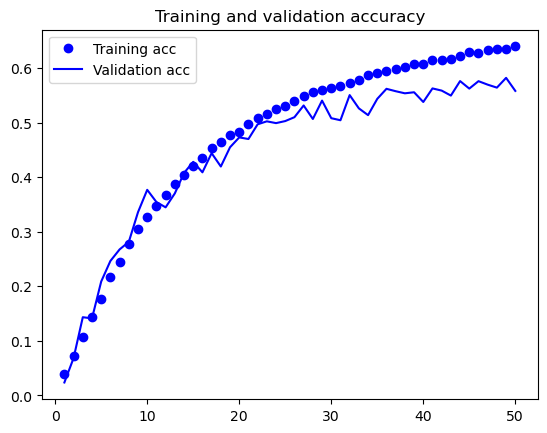

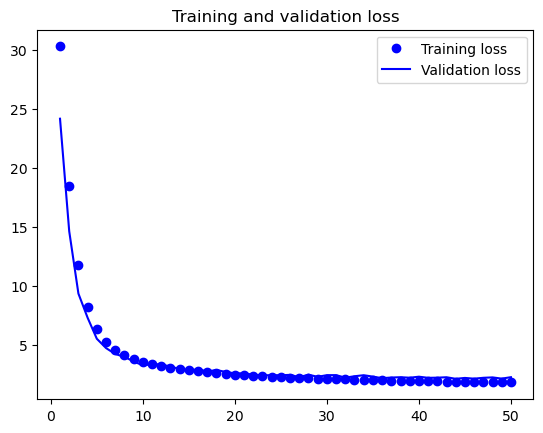

313/313 [==============================] - 3s 7ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.85333   0.64000   0.73143       100
          dolphin    0.72917   0.70000   0.71429       100
            otter    0.49254   0.33000   0.39521       100
             seal    0.58065   0.18000   0.27481       100
            whale    0.35714   0.25000   0.29412       100
         aquarium    0.71429   0.55000   0.62147       100
             fish    0.53846   0.63000   0.58065       100
              ray    0.75000   0.54000   0.62791       100
            shark    0.71287   0.72000   0.71642       100
            trout    0.86076   0.68000   0.75978       100
          orchids    0.49333   0.37000   0.42286       100
          poppies    0.47312   0.44000   0.45596       100
            roses    0.70732   0.58000   0.63736       100
       sunflowers    0.63750   0.51000   0.56667       100
           tulips    0.59016   0.36000   0.44720     

In [ ]:
def ResNet2():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(12):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.6)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet2 = ResNet2()

optimizer = Adam(learning_rate=0.0001)
ResNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

ResNet2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet2)
        scores = ResNet2.evaluate(test_data, test_label)
        print(f'accuracy on test set: {ResNet2.metrics_names[1]} of {scores[1]*100}')
        return ResNet2

ResNet2 = gpu()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_78 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d_10 (Depthw  (None, 16, 16, 64)       640       
 iseConv2D)                                                      
                                                                 
 batch_normalization_79 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

2024-10-05 12:59:43.726388: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_59/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 26s 42ms/step - loss: 4.2806 - accuracy: 0.0541 - val_loss: 5.6840 - val_accuracy: 0.0110
Epoch 2/50
586/586 [==============================] - 24s 41ms/step - loss: 3.8768 - accuracy: 0.1070 - val_loss: 5.2441 - val_accuracy: 0.0236
Epoch 3/50
586/586 [==============================] - 24s 41ms/step - loss: 3.6336 - accuracy: 0.1477 - val_loss: 4.5972 - val_accuracy: 0.0535
Epoch 4/50
586/586 [==============================] - 24s 41ms/step - loss: 3.4096 - accuracy: 0.1836 - val_loss: 4.3386 - val_accuracy: 0.0827
Epoch 5/50
586/586 [==============================] - 24s 41ms/step - loss: 3.2402 - accuracy: 0.2157 - val_loss: 4.1047 - val_accuracy: 0.1127
Epoch 6/50
586/586 [==============================] - 24s 41ms/step - loss: 3.1082 - accuracy: 0.2400 - val_loss: 4.0334 - val_accuracy: 0.1230
Epoch 7/50
586/586 [==============================] - 24s 41ms/step - loss: 3.0129 - accuracy: 0.2567 - val_loss: 3.8519 - val_accuracy: 0.1409
Epo

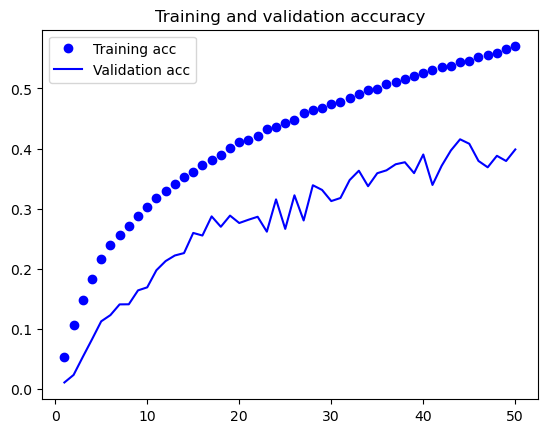

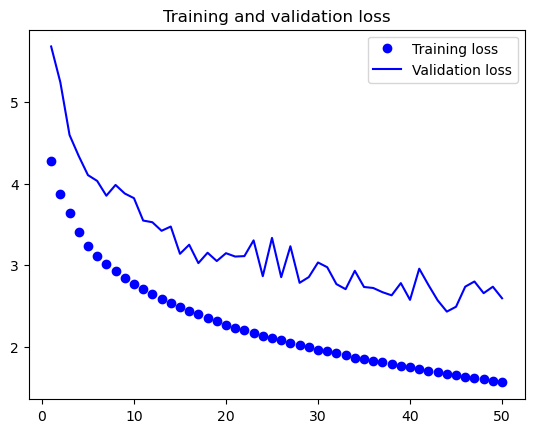

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.85185   0.69000   0.76243       100
          dolphin    0.69231   0.45000   0.54545       100
            otter    0.42222   0.19000   0.26207       100
             seal    0.17333   0.13000   0.14857       100
            whale    0.26087   0.12000   0.16438       100
         aquarium    0.51351   0.19000   0.27737       100
             fish    0.43262   0.61000   0.50622       100
              ray    0.61017   0.36000   0.45283       100
            shark    0.56383   0.53000   0.54639       100
            trout    0.68750   0.44000   0.53659       100
          orchids    0.53333   0.08000   0.13913       100
          poppies    0.66667   0.04000   0.07547       100
            roses    0.80556   0.29000   0.42647       100
       sunflowers    0.54545   0.30000   0.38710       100
           tulips    0.55556   0.05000   0.09174     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D

def MobileNet2():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(GlobalAveragePooling2D())


    model.add(Dense(100, activation='softmax'))

    return model


MobileNet2 = MobileNet2()
MobileNet2.summary()

optimizer = Adam(learning_rate=0.0001)
MobileNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = MobileNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet2)
        scores = MobileNet2.evaluate(test_data, test_label)
        print(f'accuracy on test set: {MobileNet2.metrics_names[1]} of {scores[1]*100}')
        return MobileNet2

MobileNet2 = gpu()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_89 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 16, 16, 32)        0         
                                                                 
 conv2d_99 (Conv2D)          (None, 16, 16, 144)       4608      
                                                                 
 batch_normalization_90 (Bat  (None, 16, 16, 144)      576       
 chNormalization)                                                
                                                                 
 re_lu_13 (ReLU)             (None, 16, 16, 144)      

2024-10-05 13:19:49.000219: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_64/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


586/586 [==============================] - 12s 16ms/step - loss: 4.7418 - accuracy: 0.0206 - val_loss: 4.7950 - val_accuracy: 0.0110
Epoch 2/50
586/586 [==============================] - 8s 14ms/step - loss: 4.4582 - accuracy: 0.0334 - val_loss: 4.6618 - val_accuracy: 0.0255
Epoch 3/50
586/586 [==============================] - 8s 14ms/step - loss: 4.2743 - accuracy: 0.0472 - val_loss: 4.7450 - val_accuracy: 0.0364
Epoch 4/50
586/586 [==============================] - 8s 14ms/step - loss: 4.0908 - accuracy: 0.0666 - val_loss: 4.3975 - val_accuracy: 0.0585
Epoch 5/50
586/586 [==============================] - 8s 14ms/step - loss: 3.9575 - accuracy: 0.0862 - val_loss: 4.3109 - val_accuracy: 0.0694
Epoch 6/50
586/586 [==============================] - 8s 14ms/step - loss: 3.8356 - accuracy: 0.1029 - val_loss: 4.2372 - val_accuracy: 0.0762
Epoch 7/50
586/586 [==============================] - 8s 14ms/step - loss: 3.7282 - accuracy: 0.1183 - val_loss: 4.1451 - val_accuracy: 0.0957
Epoch 8/5

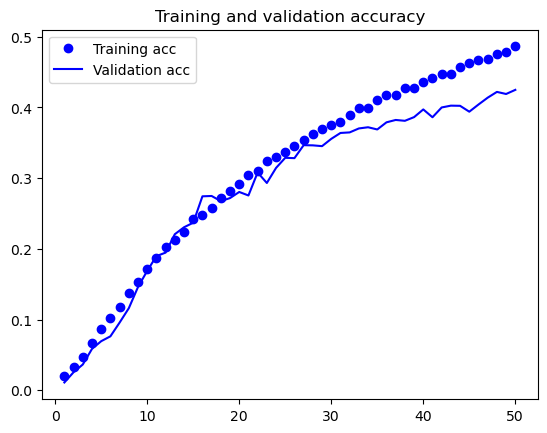

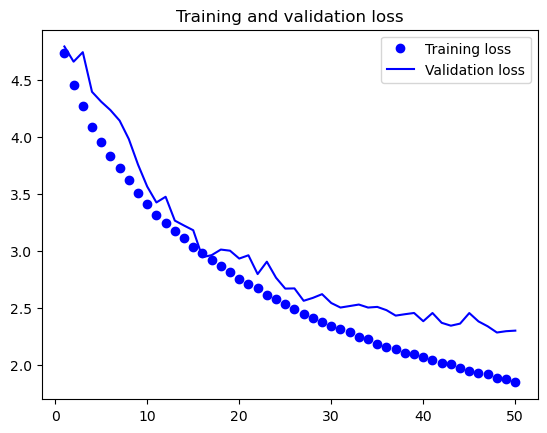

313/313 [==============================] - 2s 4ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.72917   0.70000   0.71429       100
          dolphin    0.46226   0.49000   0.47573       100
            otter    0.30693   0.31000   0.30846       100
             seal    0.19298   0.11000   0.14013       100
            whale    0.33333   0.13000   0.18705       100
         aquarium    0.36066   0.44000   0.39640       100
             fish    0.50685   0.37000   0.42775       100
              ray    0.49020   0.50000   0.49505       100
            shark    0.54369   0.56000   0.55172       100
            trout    0.74242   0.49000   0.59036       100
          orchids    0.43077   0.28000   0.33939       100
          poppies    0.63158   0.12000   0.20168       100
            roses    0.51613   0.32000   0.39506       100
       sunflowers    0.45070   0.32000   0.37427       100
           tulips    0.41176   0.14000   0.20896     

In [ ]:
import math
import time

def round_filters(filters, multiplier):
    divisor = 8
    min_depth = None
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)

def round_repeats(repeats, multiplier):
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))

def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
    expand_filters = input_filters * expand_ratio
    model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    if 0 < se_ratio <= 1:
        filters_se = max(1, int(input_filters * se_ratio))
        se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
        se = layers.Reshape((1, 1, expand_filters))(se)
        se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
        se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
        x = layers.multiply([model.layers[-1].output, se])
    else:
        x = model.layers[-1].output

    model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())

    if id_skip and strides == 1 and input_filters == output_filters:
        if drop_connect_rate:
            model.add(layers.Dropout(drop_connect_rate))
        model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

def EfficientNet2(width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, l2_reg=1e-5):
    model = models.Sequential()

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 8
    strides = [1, 2, 2, 2, 1, 1, 2, 1]
    kernels = [3, 3, 3, 5, 5, 5, 3, 3]
    filters = [24, 32, 48, 96, 128, 224, 384, 512]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks - 1):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

        model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg)))

    return model

EfficientNet2 = EfficientNet2()

optimizer = Adam(learning_rate=0.0001)
EfficientNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

EfficientNet2.summary()

def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = EfficientNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_valid, y_valid))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet2)
        scores = EfficientNet2.evaluate(test_data, test_label)
        print(f'accuracy on test set: {EfficientNet2.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet2

EfficientNet2 = gpu()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0

2024-10-06 14:43:23.589676: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1172/1172 [==============================] - 35s 22ms/step - loss: 7.2312 - accuracy: 0.0340 - val_loss: 6.9881 - val_accuracy: 0.0465
Epoch 2/100
1172/1172 [==============================] - 24s 20ms/step - loss: 6.6053 - accuracy: 0.0630 - val_loss: 6.0399 - val_accuracy: 0.0995
Epoch 3/100
1172/1172 [==============================] - 24s 20ms/step - loss: 6.2146 - accuracy: 0.0854 - val_loss: 5.7353 - val_accuracy: 0.1385
Epoch 4/100
1172/1172 [==============================] - 24s 20ms/step - loss: 5.8697 - accuracy: 0.1081 - val_loss: 5.3688 - val_accuracy: 0.1686
Epoch 5/100
1172/1172 [==============================] - 24s 20ms/step - loss: 5.5147 - accuracy: 0.1325 - val_loss: 5.0194 - val_accuracy: 0.2036
Epoch 6/100
1172/1172 [==============================] - 24s 21ms/step - loss: 5.1915 - accuracy: 0.1567 - val_loss: 4.6687 - val_accuracy: 0.2416
Epoch 7/100
1172/1172 [==============================] - 23s 20ms/step - loss: 4.8889 - accuracy: 0.1808 - val_loss: 4.4222 - val_

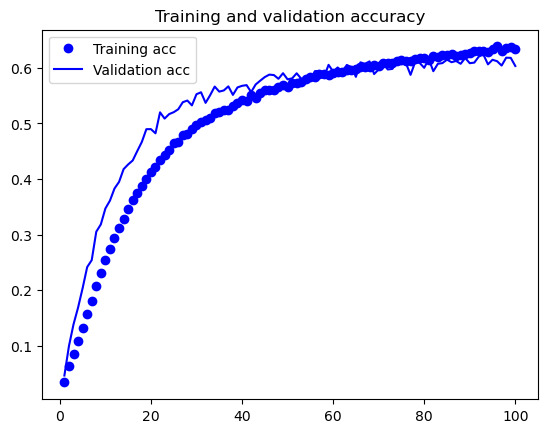

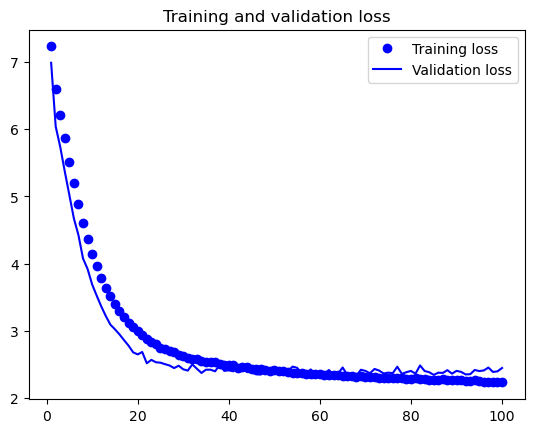

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.90476   0.76000   0.82609       100
          dolphin    0.84524   0.71000   0.77174       100
            otter    0.49038   0.51000   0.50000       100
             seal    0.53846   0.28000   0.36842       100
            whale    0.27273   0.39000   0.32099       100
         aquarium    0.59259   0.64000   0.61538       100
             fish    0.62810   0.76000   0.68778       100
              ray    0.64211   0.61000   0.62564       100
            shark    0.78000   0.78000   0.78000       100
            trout    0.81522   0.75000   0.78125       100
          orchids    0.61194   0.41000   0.49102       100
          poppies    0.38356   0.28000   0.32370       100
            roses    0.54400   0.68000   0.60444       100
       sunflowers    0.63158   0.48000   0.54545       100
           tulips    0.55357   0.62000   0.58491     

In [ ]:
def CNN3():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

CNN3 = CNN3()

optimizer = Adam(learning_rate=0.0001)
CNN3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


CNN3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN3.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    epochs=100,
                                    validation_data=(X_valid, y_valid),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN3)
        scores = CNN3.evaluate(test_data, test_label)
        print(f'accuracy on test set: {CNN3.metrics_names[1]} of {scores[1]*100}')
        return CNN3

CNN3 = gpu()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

2024-10-06 15:23:02.686828: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1172/1172 [==============================] - 32s 21ms/step - loss: 15.4657 - accuracy: 0.0159 - val_loss: 13.4079 - val_accuracy: 0.0162
Epoch 2/100
1172/1172 [==============================] - 24s 20ms/step - loss: 11.7525 - accuracy: 0.0273 - val_loss: 10.2369 - val_accuracy: 0.0307
Epoch 3/100
1172/1172 [==============================] - 24s 20ms/step - loss: 8.8966 - accuracy: 0.0390 - val_loss: 8.3440 - val_accuracy: 0.0360
Epoch 4/100
1172/1172 [==============================] - 24s 20ms/step - loss: 6.9704 - accuracy: 0.0520 - val_loss: 6.3541 - val_accuracy: 0.0538
Epoch 5/100
1172/1172 [==============================] - 23s 20ms/step - loss: 5.8387 - accuracy: 0.0652 - val_loss: 5.2624 - val_accuracy: 0.0888
Epoch 6/100
1172/1172 [==============================] - 23s 20ms/step - loss: 5.1402 - accuracy: 0.0816 - val_loss: 4.9273 - val_accuracy: 0.0787
Epoch 7/100
1172/1172 [==============================] - 23s 20ms/step - loss: 4.7089 - accuracy: 0.0954 - val_loss: 4.5422 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1172/1172 [==============================] - 25s 21ms/step - loss: 1.9074 - accuracy: 0.5643 - val_loss: 2.0470 - val_accuracy: 0.5455
Epoch 60/100
1172/1172 [==============================] - 24s 21ms/step - loss: 1.8785 - accuracy: 0.5731 - val_loss: 2.0111 - val_accuracy: 0.5543
Epoch 61/100
1172/1172 [==============================] - 24s 20ms/step - loss: 1.8806 - accuracy: 0.5703 - val_loss: 1.9687 - val_accuracy: 0.5590
Epoch 62/100
1172/1172 [==============================] - 23s 20ms/step - loss: 1.8574 - accuracy: 0.5789 - val_loss: 1.9569 - val_accuracy: 0.5610
Epoch 63/100
1172/1172 [==============================] - 23s 20ms/step - loss: 1.8423 - accuracy: 0.5798 - val_loss: 1.9824 - val_accuracy: 0.5605
Epoch 64/100
1172/1172 [==============================] - 23s 20ms/step - loss: 1.8293 - accuracy: 0.5837 - val_loss: 2.1216 - val_accuracy: 0.5364
Epoch 65/100
1172/1172 [==============================] - 24s 21ms/step - loss: 1.8097 - accuracy: 0.5921 - val_loss: 1.9398 

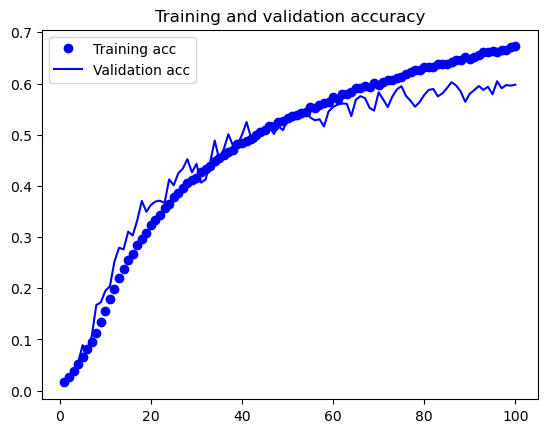

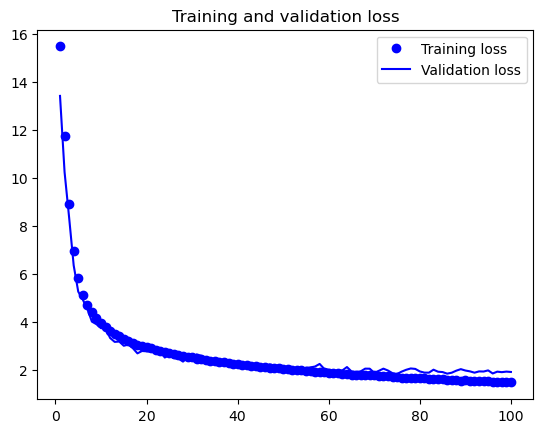

313/313 [==============================] - 1s 4ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.86250   0.69000   0.76667       100
          dolphin    0.79762   0.67000   0.72826       100
            otter    0.57831   0.48000   0.52459       100
             seal    0.42029   0.29000   0.34320       100
            whale    0.23270   0.37000   0.28571       100
         aquarium    0.77632   0.59000   0.67045       100
             fish    0.61940   0.83000   0.70940       100
              ray    0.54032   0.67000   0.59821       100
            shark    0.60331   0.73000   0.66063       100
            trout    0.85227   0.75000   0.79787       100
          orchids    0.49333   0.37000   0.42286       100
          poppies    0.41892   0.31000   0.35632       100
            roses    0.66355   0.71000   0.68599       100
       sunflowers    0.53571   0.60000   0.56604       100
           tulips    0.67143   0.47000   0.55294     

In [ ]:
def VGG3():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG3 = VGG3()

VGG3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

VGG3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG3.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    epochs=100,
                                    validation_data=(X_valid, y_valid),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG3)
        scores = VGG3.evaluate(test_data, test_label)
        print(f'accuracy on test set: {VGG3.metrics_names[1]} of {scores[1]*100}')
        return VGG3

VGG3 = gpu()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_50 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d_13 (Depthw  (None, 16, 16, 64)       640       
 iseConv2D)                                                      
                                                                 
 batch_normalization_51 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

2024-10-06 17:23:20.477312: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_28/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1172/1172 [==============================] - 32s 20ms/step - loss: 4.6970 - accuracy: 0.0243 - val_loss: 4.7270 - val_accuracy: 0.0240
Epoch 2/100
1172/1172 [==============================] - 23s 19ms/step - loss: 4.3914 - accuracy: 0.0430 - val_loss: 4.5105 - val_accuracy: 0.0374
Epoch 3/100
1172/1172 [==============================] - 23s 19ms/step - loss: 4.1941 - accuracy: 0.0605 - val_loss: 4.2679 - val_accuracy: 0.0562
Epoch 4/100
1172/1172 [==============================] - 22s 19ms/step - loss: 4.0155 - accuracy: 0.0825 - val_loss: 4.0929 - val_accuracy: 0.0788
Epoch 5/100
1172/1172 [==============================] - 22s 19ms/step - loss: 3.8905 - accuracy: 0.0991 - val_loss: 3.9149 - val_accuracy: 0.0991
Epoch 6/100
1172/1172 [==============================] - 23s 19ms/step - loss: 3.7811 - accuracy: 0.1162 - val_loss: 3.7073 - val_accuracy: 0.1308
Epoch 7/100
1172/1172 [==============================] - 22s 19ms/step - loss: 3.6607 - accuracy: 0.1346 - val_loss: 3.5868 - val_

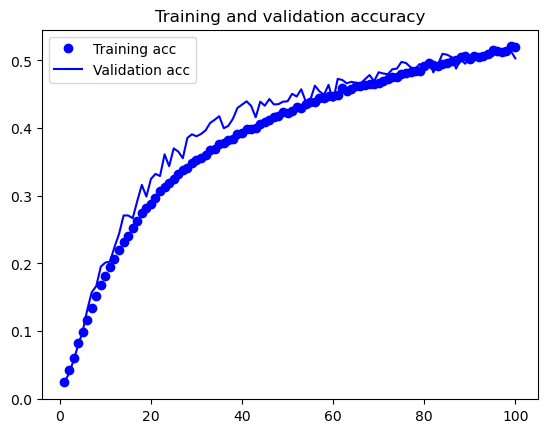

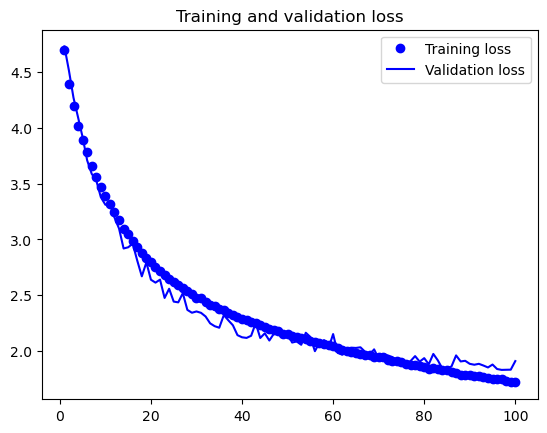

313/313 [==============================] - 1s 2ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.82609   0.76000   0.79167       100
          dolphin    0.68056   0.49000   0.56977       100
            otter    0.41791   0.28000   0.33533       100
             seal    0.41935   0.26000   0.32099       100
            whale    0.34091   0.30000   0.31915       100
         aquarium    0.45045   0.50000   0.47393       100
             fish    0.61458   0.59000   0.60204       100
              ray    0.62963   0.51000   0.56354       100
            shark    0.29811   0.79000   0.43288       100
            trout    0.73418   0.58000   0.64804       100
          orchids    0.59574   0.28000   0.38095       100
          poppies    0.54902   0.28000   0.37086       100
            roses    0.54472   0.67000   0.60090       100
       sunflowers    0.46847   0.52000   0.49289       100
           tulips    0.50794   0.32000   0.39264     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

def MobileNet3():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())

    model.add(Dropout(0.4))

    model.add(Dense(100, activation='softmax'))

    return model


MobileNet3 = MobileNet3()

MobileNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

MobileNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = MobileNet3.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    epochs=100,
                                    validation_data=(X_valid, y_valid),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet3)
        scores = MobileNet3.evaluate(test_data, test_label)
        print(f'accuracy on test set: {MobileNet3.metrics_names[1]} of {scores[1]*100}')
        return MobileNet3

MobileNet3 = gpu()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_61 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_18 (ReLU)             (None, 16, 16, 32)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 144)       4608      
                                                                 
 batch_normalization_62 (Bat  (None, 16, 16, 144)      576       
 chNormalization)                                                
                                                                 
 re_lu_19 (ReLU)             (None, 16, 16, 144)      

2024-10-06 18:01:07.633476: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_34/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1172/1172 [==============================] - 40s 22ms/step - loss: 4.7818 - accuracy: 0.0164 - val_loss: 4.7916 - val_accuracy: 0.0133
Epoch 2/100
1172/1172 [==============================] - 25s 21ms/step - loss: 4.4531 - accuracy: 0.0311 - val_loss: 4.6452 - val_accuracy: 0.0266
Epoch 3/100
1172/1172 [==============================] - 25s 21ms/step - loss: 4.2754 - accuracy: 0.0425 - val_loss: 4.6502 - val_accuracy: 0.0364
Epoch 4/100
1172/1172 [==============================] - 24s 21ms/step - loss: 4.1324 - accuracy: 0.0591 - val_loss: 4.2990 - val_accuracy: 0.0542
Epoch 5/100
1172/1172 [==============================] - 24s 21ms/step - loss: 4.0175 - accuracy: 0.0763 - val_loss: 4.0245 - val_accuracy: 0.0813
Epoch 6/100
1172/1172 [==============================] - 25s 21ms/step - loss: 3.9115 - accuracy: 0.0878 - val_loss: 3.8842 - val_accuracy: 0.0950
Epoch 7/100
1172/1172 [==============================] - 25s 21ms/step - loss: 3.8191 - accuracy: 0.0977 - val_loss: 3.7418 - val_

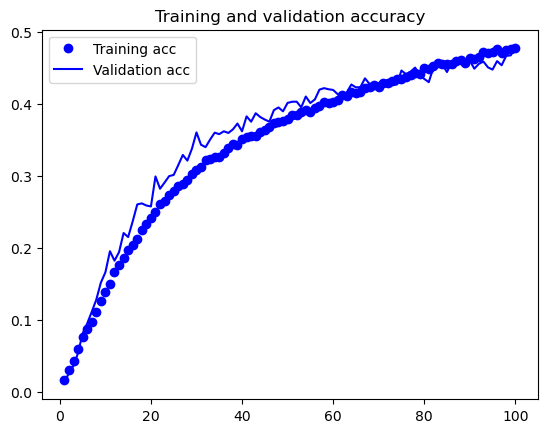

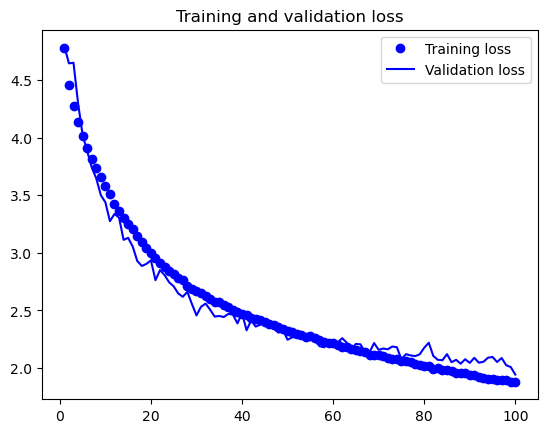

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.72917   0.70000   0.71429       100
          dolphin    0.55455   0.61000   0.58095       100
            otter    0.41772   0.33000   0.36872       100
             seal    0.31633   0.31000   0.31313       100
            whale    0.19595   0.29000   0.23387       100
         aquarium    0.57692   0.45000   0.50562       100
             fish    0.51145   0.67000   0.58009       100
              ray    0.55340   0.57000   0.56158       100
            shark    0.63636   0.63000   0.63317       100
            trout    0.85294   0.58000   0.69048       100
          orchids    0.34409   0.32000   0.33161       100
          poppies    0.43333   0.26000   0.32500       100
            roses    0.60638   0.57000   0.58763       100
       sunflowers    0.38793   0.45000   0.41667       100
           tulips    0.47368   0.27000   0.34395     

In [ ]:
import math
import time

def round_filters(filters, multiplier):
    divisor = 8
    min_depth = None
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)

def round_repeats(repeats, multiplier):
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))

def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
    expand_filters = input_filters * expand_ratio
    model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    if 0 < se_ratio <= 1:
        filters_se = max(1, int(input_filters * se_ratio))
        se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
        se = layers.Reshape((1, 1, expand_filters))(se)
        se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
        se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
        x = layers.multiply([model.layers[-1].output, se])
    else:
        x = model.layers[-1].output

    model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())

    if id_skip and strides == 1 and input_filters == output_filters:
        if drop_connect_rate:
            model.add(layers.Dropout(drop_connect_rate))
        model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

def EfficientNet3(width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, l2_reg=1e-5):
    model = models.Sequential()

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 9
    strides = [1, 2, 2, 2, 1, 1, 2, 1]
    kernels = [3, 3, 3, 5, 5, 5, 3, 3]
    filters = [24, 32, 48, 96, 128, 224, 384, 512, 576]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks - 1):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

        model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg)))

    return model

EfficientNet3 = EfficientNet3()

EfficientNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

EfficientNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)


import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = EfficientNet3.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    epochs=100,
                                    validation_data=(X_valid, y_valid),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet3)
        scores = EfficientNet3.evaluate(test_data, test_label)
        print(f'accuracy on test set: {EfficientNet3.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet3

EfficientNet3 = gpu()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_262 (Conv2D)            (None, 32, 32, 64)   1792        ['input_4[0][0]']                
                                                                                                  
 batch_normalization_234 (Batch  (None, 32, 32, 64)  256         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_263 (Conv2D)            (None, 32, 32, 64)   36928       ['batch_normalization_234[0

2024-10-05 17:57:39.192221: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout_139/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1172/1172 [==============================] - 63s 34ms/step - loss: 9.5179 - accuracy: 0.0214 - val_loss: 11.5440 - val_accuracy: 0.0166
Epoch 2/100
1172/1172 [==============================] - 39s 33ms/step - loss: 8.8696 - accuracy: 0.0417 - val_loss: 9.6095 - val_accuracy: 0.0316
Epoch 3/100
1172/1172 [==============================] - 39s 33ms/step - loss: 8.4621 - accuracy: 0.0615 - val_loss: 8.5947 - val_accuracy: 0.0578
Epoch 4/100
1172/1172 [==============================] - 39s 33ms/step - loss: 8.0765 - accuracy: 0.0780 - val_loss: 8.0042 - val_accuracy: 0.0722
Epoch 5/100
1172/1172 [==============================] - 39s 33ms/step - loss: 7.6059 - accuracy: 0.0959 - val_loss: 7.8464 - val_accuracy: 0.0666
Epoch 6/100
1172/1172 [==============================] - 39s 33ms/step - loss: 7.1609 - accuracy: 0.1100 - val_loss: 6.9766 - val_accuracy: 0.1203
Epoch 7/100
1172/1172 [==============================] - 39s 33ms/step - loss: 6.6856 - accuracy: 0.1301 - val_loss: 6.6738 - val

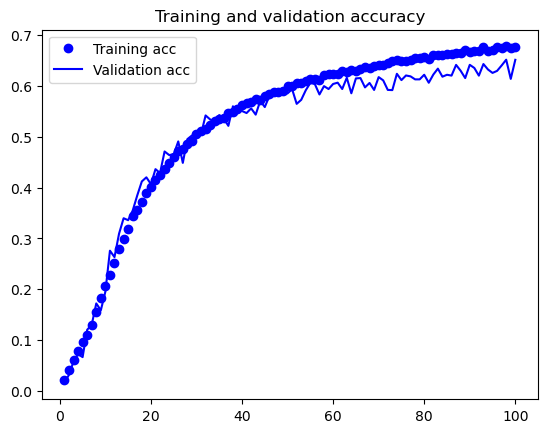

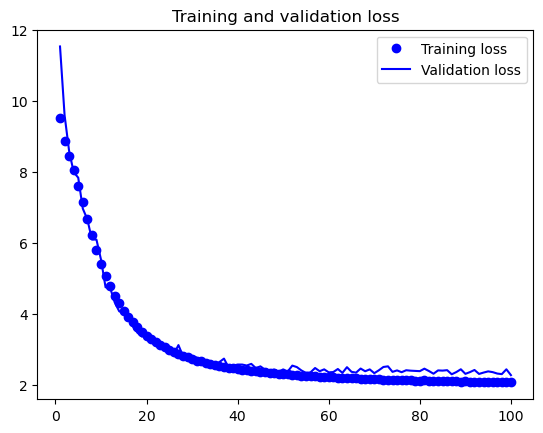

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.87879   0.87000   0.87437       100
          dolphin    0.85897   0.67000   0.75281       100
            otter    0.50495   0.51000   0.50746       100
             seal    0.48718   0.38000   0.42697       100
            whale    0.31915   0.60000   0.41667       100
         aquarium    0.61600   0.77000   0.68444       100
             fish    0.57778   0.78000   0.66383       100
              ray    0.62712   0.74000   0.67890       100
            shark    0.79208   0.80000   0.79602       100
            trout    0.80808   0.80000   0.80402       100
          orchids    0.59701   0.40000   0.47904       100
          poppies    0.46970   0.31000   0.37349       100
            roses    0.63780   0.81000   0.71366       100
       sunflowers    0.53097   0.60000   0.56338       100
           tulips    0.74576   0.44000   0.55346     

In [ ]:
def ResNet3():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(6):
        residual = x
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(4):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(3):
        residual = x
        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet3 = ResNet3()


ResNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

ResNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet3.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    epochs=100,
                                    validation_data=(X_valid, y_valid),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet3)
        scores = ResNet3.evaluate(test_data, test_label)
        print(f'accuracy on test set: {ResNet3.metrics_names[1]} of {scores[1]*100}')
        return ResNet3

ResNet3 = gpu()

In [ ]:
#Setting batch size and preparing the data generator for better regularization.
batch_size = 32
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

#Setting input and image size for ViT.
input_shape = (32, 32, 3)
image_size = 256
num_classes = 100

def build_ViT_model():
    inputs = Input(shape=input_shape)
    #Resizing image with Lambda.
    x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (image_size, image_size)))(inputs)
    base_model = vit.vit_b16(image_size=image_size, activation="sigmoid", pretrained=True, include_top=False, pretrained_top=False)
    #Set false for transfer learning in the beginning.
    base_model.trainable = False
    x = base_model(x)
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation=tfa.activations.gelu)(x)
    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation="softmax")(x)

    model_ViT = Model(inputs=inputs, outputs=outputs)
    return model_ViT

In [ ]:
#Training top layer.
ViT_model = build_ViT_model()
ViT_model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
ViT_model.summary()
print("\n")
ViT_model.fit(train_generator, steps_per_epoch=200, epochs=5, validation_data=(X_valid, y_valid))
gc.collect()

347502902/347502902 [==============================] - 5s 0us/step


/opt/conda/lib/python3.10/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                24608     
                                                             

763

In [ ]:
#Make VIT layer trainable to train all layers for fine tuning.
for layer in ViT_model.layers:
    layer.trainable = True

#Compile again
ViT_model.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])

ViT_model.summary()
print("\n")
history = ViT_model.fit(train_generator, steps_per_epoch=200, epochs=30, validation_data=(X_valid, y_valid))
print("\nTest Accuracy: ", accuracy_score(np.argmax(test_label, axis=1), np.argmax(ViT_model.predict(test_data), axis=1)))
scores = ViT_model.evaluate(test_data, test_label)
print(f'accuracy on test set: {ViT_model.metrics_names[1]} of {scores[1]*100}')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                24608     
                                                             

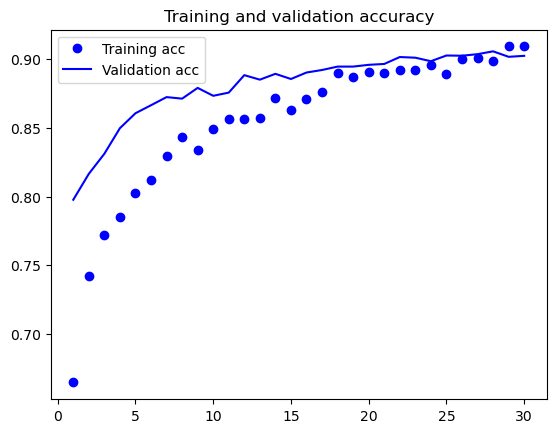

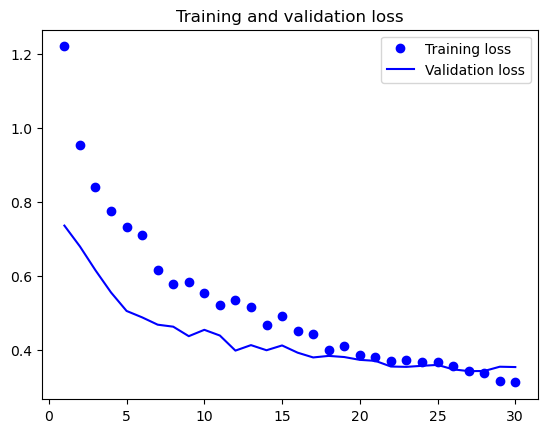

In [ ]:
training_plot(history)

In [ ]:
#Get predictions
y_pred=ViT_model.predict(test_data)
y_true=np.argmax(y_pred,axis=1)
y_true= pd.Series(y_true,name="Label")

313/313 [==============================] - 101s 323ms/step


In [ ]:
from numpy import argmax
from sklearn.metrics import classification_report

evaluation(ViT_model)

313/313 [==============================] - 101s 323ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.95098   0.97000   0.96040       100
          dolphin    0.92308   0.96000   0.94118       100
            otter    0.80769   0.84000   0.82353       100
             seal    0.86916   0.93000   0.89855       100
            whale    0.88298   0.83000   0.85567       100
         aquarium    0.91262   0.94000   0.92611       100
             fish    0.95960   0.95000   0.95477       100
              ray    0.92523   0.99000   0.95652       100
            shark    0.94059   0.95000   0.94527       100
            trout    0.96078   0.98000   0.97030       100
          orchids    0.84615   0.77000   0.80628       100
          poppies    0.66355   0.71000   0.68599       100
            roses    0.84348   0.97000   0.90233       100
       sunflowers    0.93750   0.90000   0.91837       100
           tulips    0.91589   0.98000   0.94686 

1/1 [==============================] - 0s 84ms/step


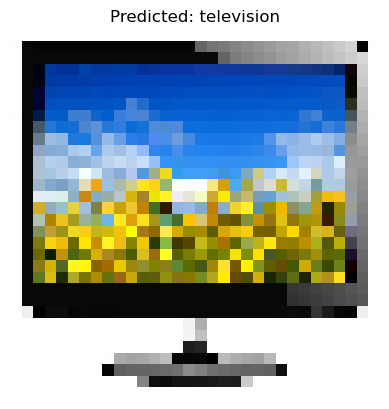

Image: cl-television.jpg
Predicted Label Index: 87
Predicted Class Name: television
Image saved to: /content/Labelled-Images/television/cl-television.jpg


1/1 [==============================] - 0s 49ms/step


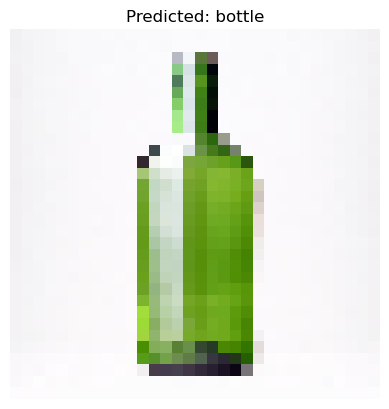

Image: Bouteille.jpg
Predicted Label Index: 9
Predicted Class Name: bottle
Image saved to: /content/Labelled-Images/bottle/Bouteille.jpg


1/1 [==============================] - 0s 48ms/step


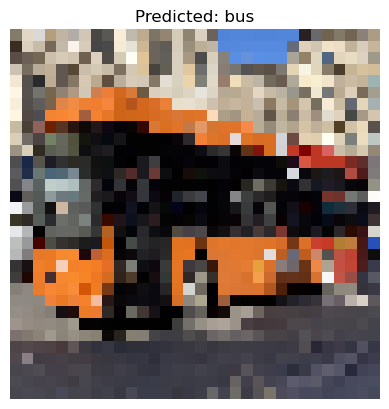

Image: Cardiff_Bus_in_St_Mary_Street_Cardiff._April_2023.jpg
Predicted Label Index: 13
Predicted Class Name: bus
Image saved to: /content/Labelled-Images/bus/Cardiff_Bus_in_St_Mary_Street_Cardiff._April_2023.jpg


1/1 [==============================] - 0s 49ms/step


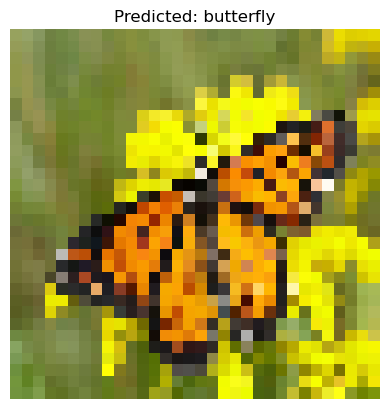

Image: 30730637487-monarch-danaus-plexippus.jpg
Predicted Label Index: 14
Predicted Class Name: butterfly
Image saved to: /content/Labelled-Images/butterfly/30730637487-monarch-danaus-plexippus.jpg


1/1 [==============================] - 0s 50ms/step


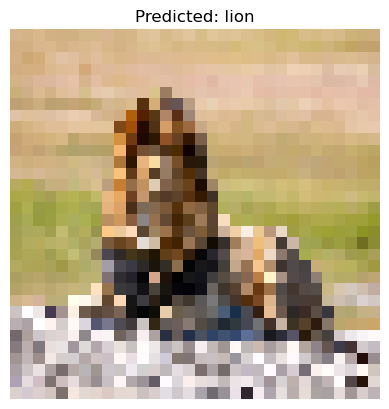

Image: 020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg
Predicted Label Index: 43
Predicted Class Name: lion
Image saved to: /content/Labelled-Images/lion/020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg


1/1 [==============================] - 0s 51ms/step


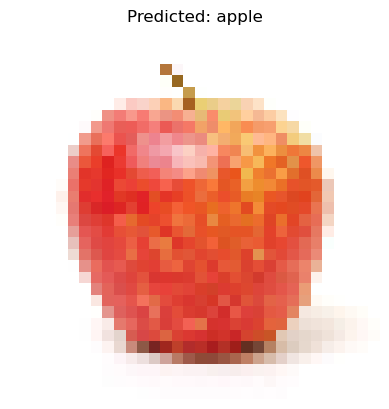

Image: RF-10008-RIPE-ORGANIC-ORGANIC-APPLE-GALA.jpg
Predicted Label Index: 0
Predicted Class Name: apple
Image saved to: /content/Labelled-Images/apple/RF-10008-RIPE-ORGANIC-ORGANIC-APPLE-GALA.jpg


1/1 [==============================] - 0s 51ms/step


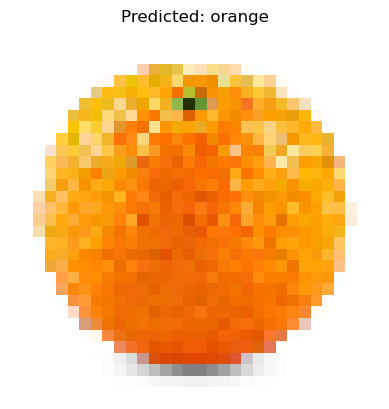

Image: oranges_opt.jpg
Predicted Label Index: 53
Predicted Class Name: orange
Image saved to: /content/Labelled-Images/orange/oranges_opt.jpg


1/1 [==============================] - 0s 50ms/step


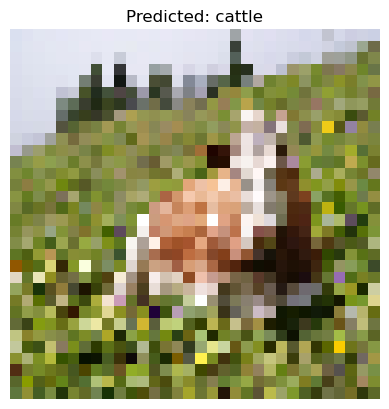

Image: Cow_(Fleckvieh_breed)_Oeschinensee_Slaunger_2009-07-07.jpg
Predicted Label Index: 19
Predicted Class Name: cattle
Image saved to: /content/Labelled-Images/cattle/Cow_(Fleckvieh_breed)_Oeschinensee_Slaunger_2009-07-07.jpg


1/1 [==============================] - 0s 48ms/step


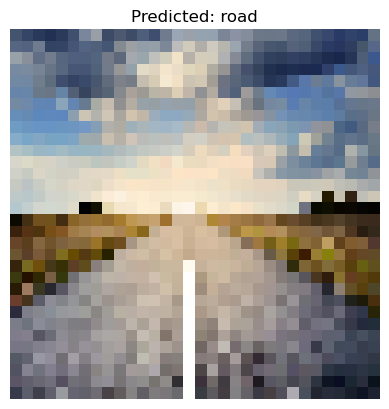

Image: pexels-pixabay-56832.jpg
Predicted Label Index: 68
Predicted Class Name: road
Image saved to: /content/Labelled-Images/road/pexels-pixabay-56832.jpg


1/1 [==============================] - 0s 51ms/step


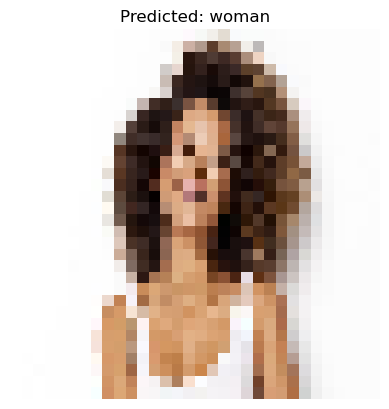

Image: Mental-Strong-Women-min-480x340.jpg
Predicted Label Index: 98
Predicted Class Name: woman
Image saved to: /content/Labelled-Images/woman/Mental-Strong-Women-min-480x340.jpg




In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
    'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

def preprocess_and_predict_folder(folder_path, ViT_model, output_base_path):
    # Get a list of image files
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)

        # Preprocess the images
        img = image.load_img(img_path, target_size=(32, 32))  # CIFAR-100 image size is 32x32
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize to match the training data

        # Use the model to predict
        predictions = ViT_model.predict(img_array)
        predicted_label = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
        predicted_class_name = cifar100_labels[predicted_label]

        # Create folder based on predicted class name if it doesn't exist in the output directory
        output_folder = os.path.join(output_base_path, predicted_class_name)
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Move the image to the corresponding folder
        output_img_path = os.path.join(output_folder, img_file)
        shutil.copy(img_path, output_img_path)

        # Optionally, display the image and the prediction
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class_name}")
        plt.axis('off')
        plt.show()

        print(f"Image: {img_file}")
        print(f"Predicted Label Index: {predicted_label}")
        print(f"Predicted Class Name: {predicted_class_name}")
        print(f"Image saved to: {output_img_path}")
        print("\n")

# Example usage
folder_path = "/kaggle/input/predictions2/Images"  # Replace with the actual folder path
output_base_path = "/content/Labelled-Images"  # Writable directory on Kaggle
preprocess_and_predict_folder(folder_path, ViT_model, output_base_path)